# Линейная регрессия
__Суммарное количество баллов: 10__


In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import os
import pandas as pd

np.random.seed(0)

In [2]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

#### Метрика
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика RMSE. Ее и нужно реализовать.

In [78]:
def mse(y_true, y_predicted):
    return np.square(y_predicted - y_true).mean()
    

def rmse(y_true, y_predicted):
    return np.sqrt(mse(y_true, y_predicted))


Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [4]:
def plus_dim(X):
    return np.hstack((X, np.ones((X.shape[0], 1))))

In [423]:
class NormalLR:
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.w = None
    
    def fit(self, X, y):  # w = (X^TX)^-1X^Ty
        X = plus_dim(X)
        _, size = X.shape
        self.w = np.matmul(
            np.matmul(
                np.linalg.inv(np.matmul(np.transpose(X), X) + self.alpha * np.identity(size)),
                np.transpose(X)
            ),
            y
        )
    
    def predict(self, X):
        return np.matmul(plus_dim(X), self.w)

In [ ]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [300]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(rmse(y_test, regr.predict(X_test)))

0.09390528005589237



Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

#### Lasso

Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [343]:
np.matmul(np.array([1, 2, 3]), np.array([[1, 2], [2, 3], [5, 6]]))

array([20, 26])

In [394]:
class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0., clip=1000):
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
        self.clip = clip
        
    def opt(self, X, y, w): # derivative of mse + L1 is 1 / n * (XW - y)X_i + l|W_i|
        n, _ = X.shape
        grad = np.matmul(self.predict(X) - y, plus_dim(X)) / n + self.l * np.abs(self.w)
        return np.clip(grad, -self.clip, self.clip)
    
    def fit(self, X, y):
        n, size = X.shape
        self.w = np.random.randn(size + 1)
        self.cost = []
        
        for _ in range(self.iterations):
            grad = self.opt(X, y, self.w)
            self.w = self.w - self.alpha * grad
    
    def predict(self, X):
        return np.matmul(plus_dim(X), self.w)

In [395]:
def build_plot(X_train, y_train, X_test, y_test):
    l = 1e-20
    reg_iterations = 10000
    errors, ls = [], []
    
    regr = GradientLR(0.1, iterations=reg_iterations, l=0.)
    regr.fit(X_train, y_train)
    errors.append(rmse(y_test, regr.predict(X_test)))
    ls.append(l)
    l *= 10
        
    while l < 1:
        regr = GradientLR(0.1, iterations=reg_iterations, l=l)
        regr.fit(X_train, y_train)
        errors.append(rmse(y_test, regr.predict(X_test)))
        ls.append(l)
        l *= 10
    
    plt.plot(errors, ls)
    plt.xlabel('error')
    plt.ylabel('regularization coeff')
    plt.show()

In [396]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.10637300761984672


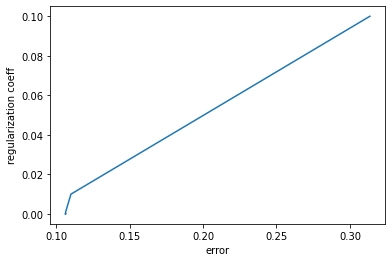

In [397]:
regr = GradientLR(0.01, iterations=10000, l=0.0)
regr.fit(X_train, y_train)
print(rmse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test)

1. Выполните загрузку и предобработку файлов x_boston_train и y_boston_train.
2. Разбейте x_boston_train и y_boston_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрику RMSE для моделей LR. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Постройте график зависимости ошибки от коэффициента регуляризации. 

In [301]:
def read_data():
    folder = './homework-linear-regression/'
    common = '_boston_train.csv'
    X_file, y_file = folder + 'x' + common, folder + 'y' + common
    return pd.read_csv(X_file).drop('Id', axis=1).values, np.squeeze(pd.read_csv(y_file).drop('Id', axis=1).values)

In [426]:
X, y = read_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.99, shuffle=False)

In [424]:
regr_normal = NormalLR()
regr_normal.fit(X_train, y_train)
print(rmse(y_test, regr_normal.predict(X_test)))

4410.205769421153


In [427]:
regr_grad = GradientLR(0.00003, iterations=100000, l=0.0, clip=2300)
regr_grad.fit(X_train, y_train)
# print(rmse(y_test, regr_grad.predict(X_test)))

Обучите модель на всех данных из x_boston_train и y_boston_train.
Сделайте submit своего решения и получите значение RMSE_score не более 5000

In [428]:
test = pd.read_csv('./homework-linear-regression/X_boston_test.csv')

submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = test["Id"]
submission["Expected"] = regr_grad.predict(test.drop('Id', axis=1).values)
submission.to_csv('submission.csv', index=False)